In [1]:
from power_spectrum import *
%matplotlib inline

In [2]:
def spectral_index(params):
    def f(k):
        if k==0:
            return zeros(len(params))
        return k**(-4*params)
    return f

In [3]:
nsims_train = 10**5
nsims_test = 10**3

p_train = rand(nsims_train,2)
p_test = rand(nsims_test, 2)

sims = lambda p: standardise_ps(fast_gaussian(spectral_index(p[:,0]), fnl=10.**(6*p[:,1]-3)), lambda x: 1, interpolate=True)

In [4]:
x_train = sims(p_train)
x_test = sims(p_test)

/global/u2/a/avirukt/proj/power_spectrum.py:160: RuntimeWarning: invalid value encountered in true_divide
  field /= k2
/global/u2/a/avirukt/proj/power_spectrum.py:327: RuntimeWarning: divide by zero encountered in true_divide
  x *= sqrt(new/current)
/global/u2/a/avirukt/proj/power_spectrum.py:327: RuntimeWarning: overflow encountered in true_divide
  x *= sqrt(new/current)
/global/u2/a/avirukt/proj/power_spectrum.py:327: RuntimeWarning: invalid value encountered in multiply
  x *= sqrt(new/current)
/global/u2/a/avirukt/proj/power_spectrum.py:160: RuntimeWarning: invalid value encountered in true_divide
  field /= k2
/global/u2/a/avirukt/proj/power_spectrum.py:327: RuntimeWarning: divide by zero encountered in true_divide
  x *= sqrt(new/current)
/global/u2/a/avirukt/proj/power_spectrum.py:327: RuntimeWarning: overflow encountered in true_divide
  x *= sqrt(new/current)
/global/u2/a/avirukt/proj/power_spectrum.py:327: RuntimeWarning: invalid value encountered in multiply
  x *= sqrt(n

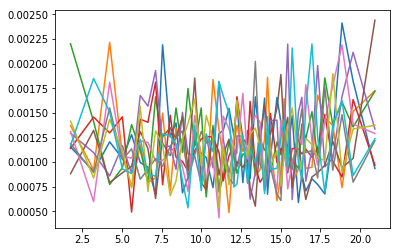

In [5]:
for i in range(10):
    plot(*dynamic_ps(x_test[i])[:2])

601 [0.1319011  0.60410946]


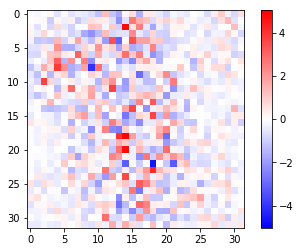

In [6]:
i = randint(nsims_test)
print(i,p_test[i])
plot_2d_field(x_test[i])

In [7]:
model = LFI(["field"], ["power spectral index","$f_{NL}$"], model_dir='/global/cscratch1/sd/avirukt/models/fnlsi1')
batch_size=128
model.train(training_fn_generator(x_train, p_train, batch_size=batch_size), max_steps=40*nsims_train//batch_size)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/global/cscratch1/sd/avirukt/models/fnlsi1', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x2aab9a988b38>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlsi1/model.ckpt-31250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


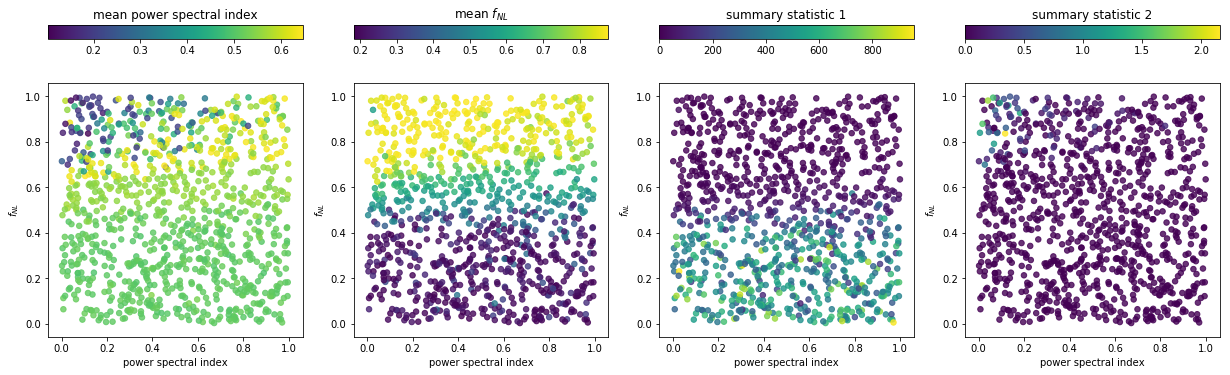

In [9]:
model.plot_2d(x_test, p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlsi1/model.ckpt-31250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


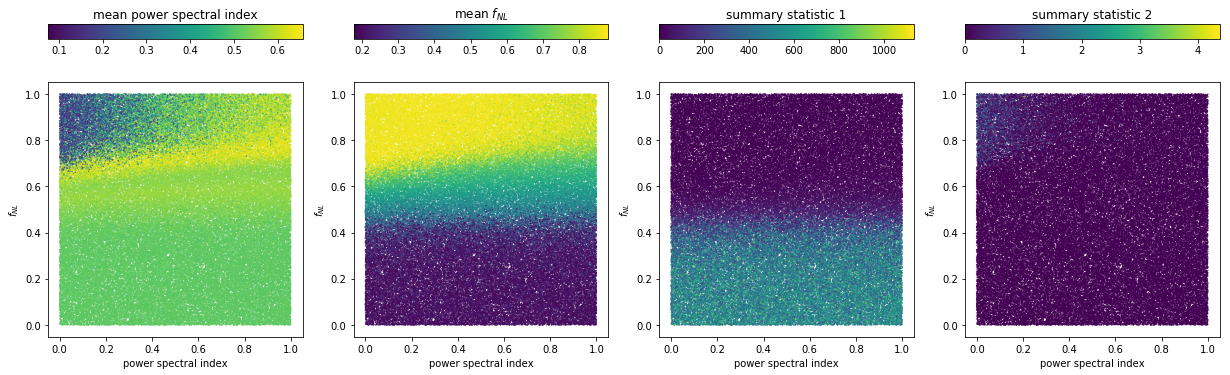

In [10]:
model.plot_2d(x_train, p_train)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlsi1/model.ckpt-31250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


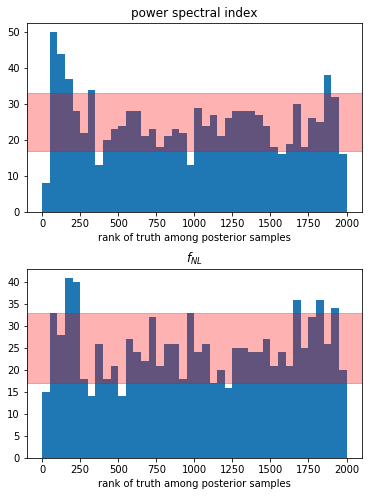

In [11]:
model.plot_ranks(x_test, p_test)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /global/cscratch1/sd/avirukt/models/fnlsi1/model.ckpt-31250
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


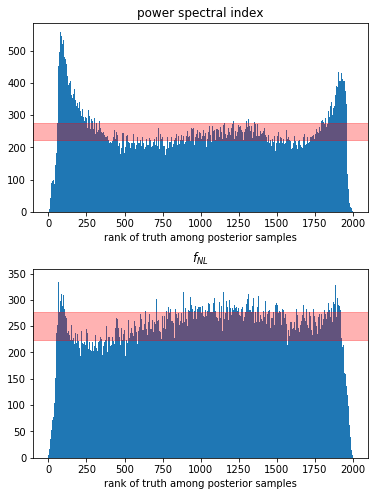

In [12]:
model.plot_ranks(x_train, p_train)